In [1]:
import zipfile36 as zipfile
import wget
import os
import pandas as pd

print('Beginning file download with wget module')
url = 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv'
wget.download(url, 'gdp data.zip')

with zipfile.ZipFile('gdp data.zip', "r") as z:
    z.extractall("")
    
gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_713242.csv',skiprows=4,dtype='str')
gdp.head(2)

Beginning file download with wget module


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2549720670.39106,2534636871.50838,2581564245.81006,2649720670.39106,2691620111.73184,2646927374.30168,2700558659.21788,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.111111,548888895.555556,546666677.777778,751111191.111111,800000044.444444,1006666637.77778,...,17804280538.1102,20001615788.6719,20561054090.3995,20484873230.2111,19907111418.9938,19362642266.6484,20191764940.1602,19362969582.3643,NaN,NaN


In [2]:
# Set the Index on Country Name - previously was numeric.
gdp_transpose = gdp.set_index('Country Name')
# Transpose the index and columns
gdp_transpose = gdp_transpose.transpose()
# Reset the index, sets, 'index' as a column
gdp_transpose = gdp_transpose.reset_index()
# Rename the 'index' column to year
gdp_transpose = gdp_transpose.rename(columns={'index':'Year'})
# Set the DataFrame Index to newly named 'Year'
gdp_transpose = gdp_transpose.set_index('Year')
gdp_transpose.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
Country Code,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Indicator Name,GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),...,GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP (current US$)
Indicator Code,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,...,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD
1960,NaN,537777811.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1372745092342.12,NaN,NaN,NaN,7575396972.87137,713000000,1052990400
1961,NaN,548888895.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1428066739652.67,NaN,NaN,NaN,7972996813.99047,696285714.285714,1096646600


In [3]:
gdp_transpose1 = gdp_transpose.drop('Country Code')


In [4]:
gdp_transpose2 = gdp_transpose1.drop('Indicator Name')

In [5]:
gdp_transpose3 = gdp_transpose2.drop('Indicator Code')
gdp_transpose4 = gdp_transpose3.drop('Unnamed: 64')
gdp_transpose4.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,537777811.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1372745092342.12,NaN,NaN,NaN,7575396972.87137,713000000,1052990400
1961,NaN,548888895.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1428066739652.67,NaN,NaN,NaN,7972996813.99047,696285714.285714,1096646600
1962,NaN,546666677.777778,NaN,NaN,NaN,NaN,NaN,24450604877.6081,NaN,NaN,...,NaN,NaN,NaN,1532502322253.44,NaN,NaN,NaN,8497996604.20055,693142857.142857,1117601600
1963,NaN,751111191.111111,NaN,NaN,NaN,NaN,NaN,18272123664.4715,NaN,NaN,...,NaN,NaN,NaN,1650921563007.65,NaN,NaN,NaN,9423396234.41086,718714285.714286,1159511700
1964,NaN,800000044.444444,NaN,NaN,NaN,NaN,NaN,25605249381.7597,NaN,NaN,...,NaN,NaN,NaN,1808553546681.45,NaN,NaN,NaN,10373995854.5513,839428571.428571,1217138000


In [6]:
gdp_transpose4.dtypes

Country Name
Aruba           object
Afghanistan     object
Angola          object
Albania         object
Andorra         object
                 ...  
Kosovo          object
Yemen, Rep.     object
South Africa    object
Zambia          object
Zimbabwe        object
Length: 264, dtype: object

In [7]:
#convert all datatype into float
gdp_transpose4 = gdp_transpose4.apply(pd.to_numeric)

In [8]:
gdp_pct_diff = gdp_transpose4
gdp_pct_diff = gdp_pct_diff.pct_change()
gdp_pct_diff.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,0.020661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.040300,NaN,NaN,NaN,0.052486,-0.023442,0.041459
1962,NaN,-0.004049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.073131,NaN,NaN,NaN,0.065847,-0.004514,0.019108
1963,NaN,0.373984,NaN,NaN,NaN,NaN,NaN,-0.252692,NaN,NaN,...,NaN,NaN,NaN,0.077272,NaN,NaN,NaN,0.108896,0.036892,0.037500
1964,NaN,0.065089,NaN,NaN,NaN,NaN,NaN,0.401329,NaN,NaN,...,NaN,NaN,NaN,0.095481,NaN,NaN,NaN,0.100877,0.167959,0.049699


In [9]:
#Transpose the data
gdp_tran = gdp_pct_diff.transpose().reset_index()
gdp_tran.head()

Year,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.043371,0.066604,-0.005916,0.018514,0.026401,0.015813,-0.016604,0.020262,0.000000,0.0
1,Afghanistan,NaN,0.020661,-0.004049,0.373984,0.065089,0.258333,0.390728,0.195238,-0.179283,...,0.274738,0.122833,0.123416,0.027970,-0.003705,-0.028204,-0.027350,0.042821,-0.041046,0.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.191906,0.334014,0.145480,0.067605,0.065850,-0.202581,-0.129696,0.207666,-0.134067,0.0
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.009736,0.080817,-0.044301,0.037054,0.035375,-0.139196,0.041664,0.098109,0.159495,0.0
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.083276,0.025738,-0.080605,0.036962,0.021072,-0.160934,0.023412,0.047293,0.074055,0.0


In [10]:
#melt the dataframe
melted_gdp = pd.melt(gdp,id_vars=['Country Name'],
                    value_vars=gdp.columns[4:],
                    var_name='Year',
                    value_name='GDP')
melted_gdp.head()

,Country Name,Year,GDP
0,Aruba,1960,NaN
1,Afghanistan,1960,537777811.111111
2,Angola,1960,NaN
3,Albania,1960,NaN
4,Andorra,1960,NaN


In [11]:
pct_dff1 = pd.melt(gdp_tran,id_vars=['Country Name'],
                 value_vars=gdp_tran.columns[1:],
                 var_name = 'Year',
                 value_name='GDP')
pct_dff1.tail()

,Country Name,Year,GDP
15835,Kosovo,2019,0.0
15836,"Yemen, Rep.",2019,0.0
15837,South Africa,2019,0.0
15838,Zambia,2019,0.0
15839,Zimbabwe,2019,0.0


In [12]:
#Merge
df5 = melted_gdp.merge(pct_dff1,left_index=True,right_index=True)
df5.head()

,Country Name_x,Year_x,GDP_x,Country Name_y,Year_y,GDP_y
0,Aruba,1960,NaN,Aruba,1960,NaN
1,Afghanistan,1960,537777811.111111,Afghanistan,1960,NaN
2,Angola,1960,NaN,Angola,1960,NaN
3,Albania,1960,NaN,Albania,1960,NaN
4,Andorra,1960,NaN,Andorra,1960,NaN


In [13]:
#drop the name and year colums that are same
df6 = df5.drop(['Country Name_y','Year_y'],axis=1)
df6

,Country Name_x,Year_x,GDP_x,GDP_y
0,Aruba,1960,NaN,NaN
1,Afghanistan,1960,537777811.111111,NaN
2,Angola,1960,NaN,NaN
3,Albania,1960,NaN,NaN
4,Andorra,1960,NaN,NaN
...,...,...,...,...
15835,Kosovo,2019,NaN,0.0
15836,"Yemen, Rep.",2019,NaN,0.0
15837,South Africa,2019,NaN,0.0
15838,Zambia,2019,NaN,0.0


In [14]:
#rename the columns
df6 = df6.rename(columns={'Country Name_x':'Country Name',
                         'Year_x':"Year",
                         'GDP_x':'GDP',
                         'GDP_y':'GDP_pct_change'})

In [15]:
df6['Year'] = pd.to_numeric(df6['Year'])


In [16]:
df6 = df6.dropna()
df6.head()

,Country Name,Year,GDP,GDP_pct_change
265,Afghanistan,1961,548888895.555556,0.020661
275,Australia,1961,19652816664.8001,0.057873
276,Austria,1961,7311749633.36229,0.109069
278,Burundi,1961,202999992,0.035714
279,Belgium,1961,12400145221.595,0.063594


In [17]:
df6.dtypes

Country Name       object
Year                int64
GDP                object
GDP_pct_change    float64
dtype: object

In [18]:
df7 = pd.DataFrame(df6)
df7['GDP'] = pd.to_numeric(df7['GDP'])
df7.dtypes

Country Name       object
Year                int64
GDP               float64
GDP_pct_change    float64
dtype: object

In [19]:
df7['GDP_pct_change'] = pd.to_numeric(df7['GDP_pct_change'])
df7.dtypes

Country Name       object
Year                int64
GDP               float64
GDP_pct_change    float64
dtype: object

In [20]:
#GDP Per Year per Quartile
gdp_quartile = df7
gdp_quartile['Quartile'] = gdp_quartile.groupby(['Year'])['GDP'].transform(
lambda x: pd.qcut(x,4, labels=range(1,5)))
gdp_quartile.head(2)

,Country Name,Year,GDP,GDP_pct_change,Quartile
265,Afghanistan,1961,5.488889e+08,0.020661,2
275,Australia,1961,1.965282e+10,0.057873,3


In [21]:
#Average GDP pct change by Quartile per year
percentage_change = gdp_quartile
percentage_change = pd.DataFrame(percentage_change.groupby(['Year','Quartile'])['GDP_pct_change'].mean())
percentage_change = percentage_change.rename(columns={'GDP_pct_change':'Average GDP Pct Change'}).reset_index()
percentage_change.head()

,Year,Quartile,Average GDP Pct Change
0,1961,1,0.069361
1,1961,2,0.029803
2,1961,3,0.065812
3,1961,4,0.021617
4,1962,1,0.061953


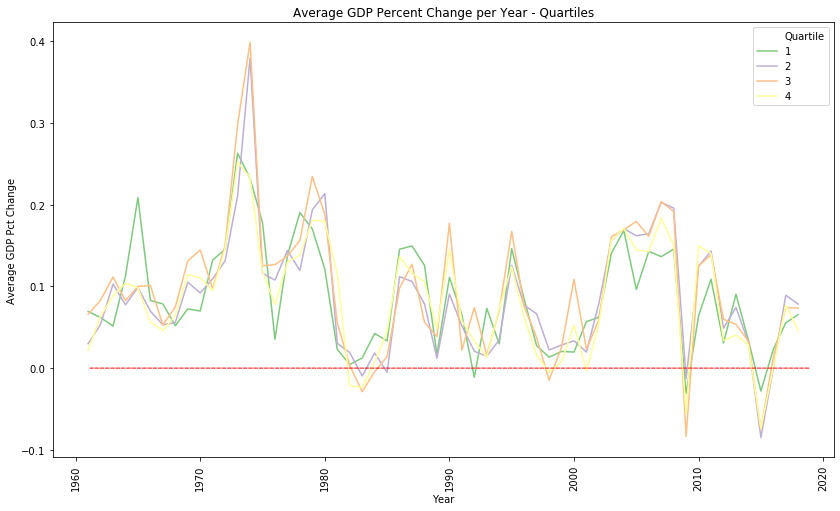

In [24]:
#Line Plot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Initialize figure and size of the plot
plt.figure(figsize=(14,8))

# Seaborn line plot
ax = sns.lineplot(x='Year',y='Average GDP Pct Change',
                  data=percentage_change,
                  hue='Quartile',
                  palette='Accent')

# Create a dashed line at zero for comparison
ax.annotate("",
            xy=(1961, 0), xycoords='data',
            xytext=(2019, 0), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            ls='dashed',
                            edgecolor = "red",
                            connectionstyle="arc3, rad=0"),
           )


# Set xtick labels and rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=90)
# Set the title
plt.title('Average GDP Percent Change per Year - Quartiles')
# Grab the figure
fig = ax.get_figure()
# Save the figure
fig.savefig('images/Avg GDP pct change')